In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import visualkeras

2024-09-30 11:07:55.989014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 11:07:55.998839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 11:07:56.082472: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 11:07:56.162352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 11:07:56.238439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Розширення розмірності для згорткових шарів
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Розділення на тренувальний та валідаційний набори
val_size = 10000
x_val = x_train[-val_size:]
y_val = y_train[-val_size:]
x_train = x_train[:-val_size]
y_train = y_train[:-val_size]

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def create_model_1():
    model = keras.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_2():
    model = keras.Sequential([
        layers.Conv2D(8, (5, 5), activation='tanh', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.Flatten(),
        layers.Dense(16, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
def train_model(model, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val),
                        epochs=epochs, 
                        batch_size=batch_size)
    return history

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_classification_report(model, x, y):
    y_pred = model.predict(x)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y, y_pred_classes, target_names=class_names))

def classify_random_samples(model, x, y, num_samples=20):
    indices = np.random.choice(len(x), num_samples, replace=False)
    x_samples = x[indices]
    y_samples = y[indices]
    
    y_pred = model.predict(x_samples)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            ax.imshow(x_samples[i].reshape(28, 28), cmap='gray')
            true_label = class_names[y_samples[i]]
            pred_label = class_names[y_pred_classes[i]]
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [6]:
model_1 = create_model_1()
history_1 = train_model(model_1)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7108 - loss: 0.8291 - val_accuracy: 0.8596 - val_loss: 0.4018
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8701 - loss: 0.3695 - val_accuracy: 0.8726 - val_loss: 0.3551
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8838 - loss: 0.3271 - val_accuracy: 0.8840 - val_loss: 0.3342
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8929 - loss: 0.3002 - val_accuracy: 0.8909 - val_loss: 0.3095
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9013 - loss: 0.2770 - val_accuracy: 0.8935 - val_loss: 0.2972
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.2609 - val_accuracy: 0.8946 - val_loss: 0.2994
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2422 - val_accuracy: 0.9026 - val_loss: 0.2778
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9134 - loss: 0.2381 - 

In [7]:
model_2 = create_model_2()
history_2 = train_model(model_2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7286 - loss: 0.8112 - val_accuracy: 0.8385 - val_loss: 0.4504
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8552 - loss: 0.4188 - val_accuracy: 0.8587 - val_loss: 0.3876
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3644 - val_accuracy: 0.8704 - val_loss: 0.3642
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8824 - loss: 0.3361 - val_accuracy: 0.8732 - val_loss: 0.3511
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8844 - loss: 0.3204 - val_accuracy: 0.8789 - val_loss: 0.3396
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.2984 - val_accuracy: 0.8866 - val_loss: 0.3268
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8958 - loss: 0.2885 - val_accuracy: 0.8816 - val_loss: 0.3313
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.2833 - 

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


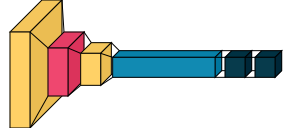

In [8]:
visualkeras.layered_view(model_1, to_file='model_1_architecture.png')
visualkeras.layered_view(model_2, to_file='model_2_architecture.png')

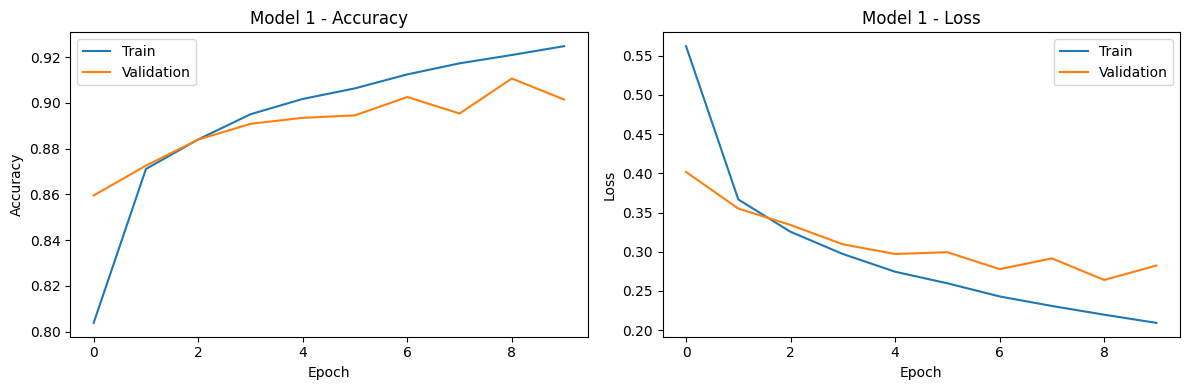

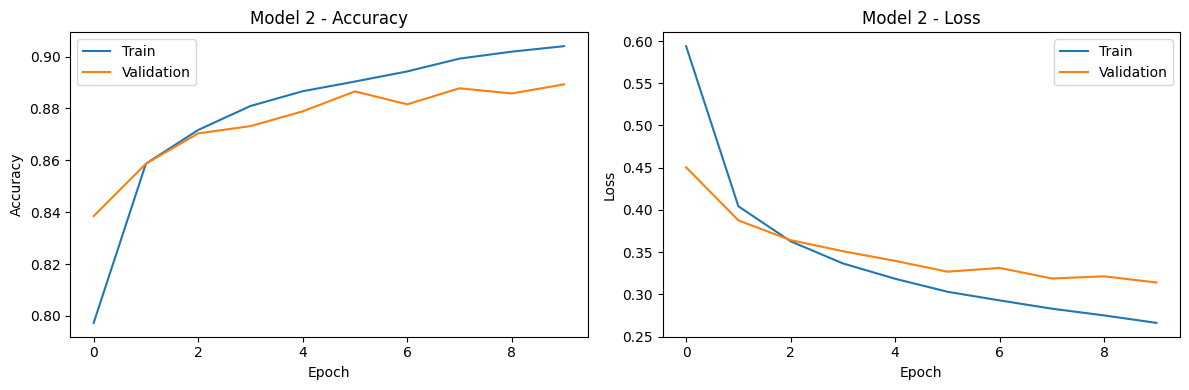

In [9]:
plot_learning_curve(history_1, 'Model 1')
plot_learning_curve(history_2, 'Model 2')

In [10]:
print("Model 1 Classification Report:")
print_classification_report(model_1, x_test, y_test)

print("\nModel 2 Classification Report:")
print_classification_report(model_2, x_test, y_test)

Model 1 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.88      0.85      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.88      0.81      0.85      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.91      0.99      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Model 2 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.

Model 1 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


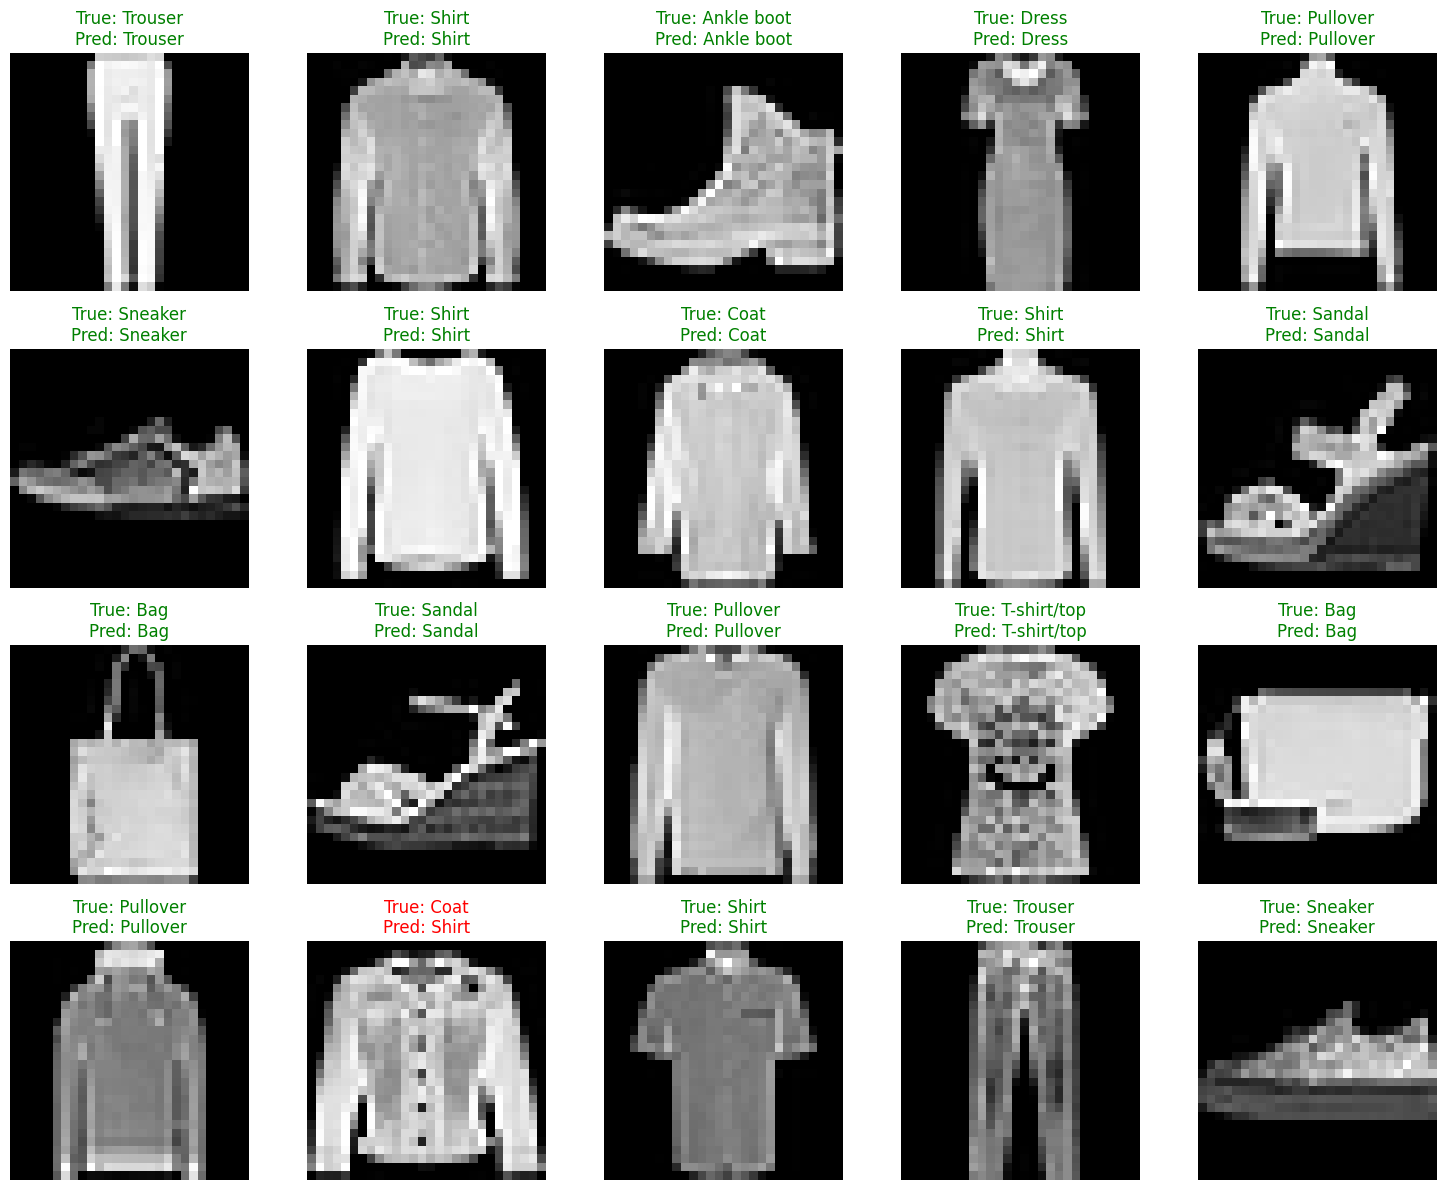

Model 2 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


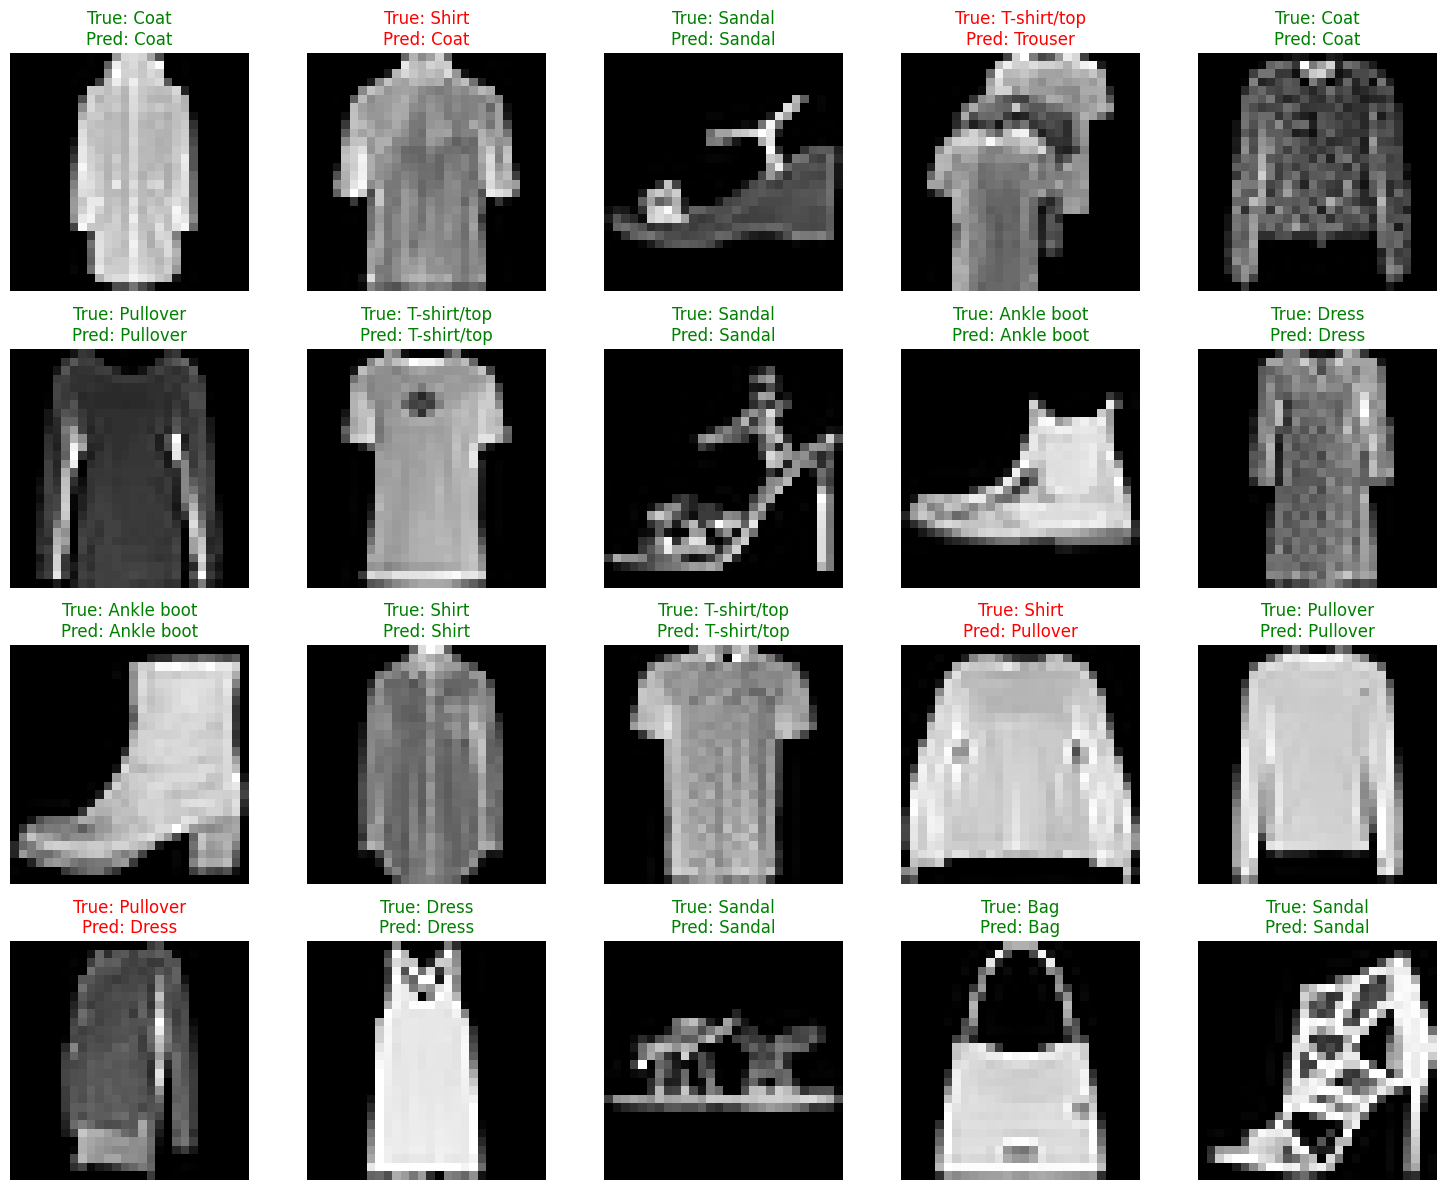

In [11]:
print("Model 1 Random Sample Classification:")
classify_random_samples(model_1, x_test, y_test)

print("Model 2 Random Sample Classification:")
classify_random_samples(model_2, x_test, y_test)

In [ ]:
epochs_range = range(30, 101, 10)
batch_sizes = [32, 64, 128, 256, 512]

results_1 = []
results_2 = []

for epochs in epochs_range:
    for batch_size in batch_sizes:
        print(f"Training with epochs={epochs}, batch_size={batch_size}")
        
        model_1 = create_model_1()
        history_1 = train_model(model_1, epochs=epochs, batch_size=batch_size)
        accuracy_1 = history_1.history['val_accuracy'][-1]
        
        model_2 = create_model_2()
        history_2 = train_model(model_2, epochs=epochs, batch_size=batch_size)
        accuracy_2 = history_2.history['val_accuracy'][-1]
        
        results_1.append({'epochs': epochs, 'batch_size': batch_size, 'accuracy': accuracy_1})
        results_2.append({'epochs': epochs, 'batch_size': batch_size, 'accuracy': accuracy_2})

Training with epochs=30, batch_size=32
Epoch 1/30


/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7096 - loss: 0.8139 - val_accuracy: 0.8556 - val_loss: 0.4082
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8588 - loss: 0.3926 - val_accuracy: 0.8699 - val_loss: 0.3585
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 0.3390 - val_accuracy: 0.8827 - val_loss: 0.3301
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8923 - loss: 0.3036 - val_accuracy: 0.8921 - val_loss: 0.3017
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8968 - loss: 0.2823 - val_accuracy: 0.8932 - val_loss: 0.2979
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9032 - loss: 0.2660 - val_accuracy: 0.8994 - val_loss: 0.2858
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9122 - loss: 0.2420 - val_accuracy: 0.9022 - val_loss: 0.2780
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9184 - loss: 0.2290 - val_accurac

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9274 - loss: 0.2009 - val_accuracy: 0.9054 - val_loss: 0.2753
Epoch 35/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9295 - loss: 0.1943 - val_accuracy: 0.9028 - val_loss: 0.2818
Epoch 36/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9307 - loss: 0.1919 - val_accuracy: 0.9073 - val_loss: 0.2699
Epoch 37/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9316 - loss: 0.1895 - val_accuracy: 0.9074 - val_loss: 0.2659
Epoch 38/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9348 - loss: 0.1819 - val_accuracy: 0.9067 - val_loss: 0.2710
Epoch 39/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9334 - loss: 0.1842 - val_accuracy: 0.9033 - val_loss: 0.2808
Epoch 40/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9338 - loss: 0.1836 - val_accuracy: 0.9047 - val_loss: 0.2807
Epoch 1/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9014 - loss: 0.2799 - val_accuracy:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9201 - loss: 0.2155 - val_accuracy: 0.9030 - val_loss: 0.2808
Epoch 13/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9203 - loss: 0.2129 - val_accuracy: 0.9025 - val_loss: 0.2722
Epoch 14/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9269 - loss: 0.1994 - val_accuracy: 0.9028 - val_loss: 0.2701
Epoch 15/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9278 - loss: 0.2007 - val_accuracy: 0.9014 - val_loss: 0.2745
Epoch 16/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9274 - loss: 0.1927 - val_accuracy: 0.9031 - val_loss: 0.2691
Epoch 17/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9325 - loss: 0.1844 - val_accuracy: 0.9012 - val_loss: 0.2958
Epoch 18/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9319 - loss: 0.1826 - val_accuracy: 0.9016 - val_loss: 0.2723
Epoch 19/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9357 - loss: 0.177

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9504 - loss: 0.1379 - val_accuracy: 0.8972 - val_loss: 0.3320
Epoch 51/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9511 - loss: 0.1371 - val_accuracy: 0.8981 - val_loss: 0.3247
Epoch 52/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9504 - loss: 0.1368 - val_accuracy: 0.8985 - val_loss: 0.3298
Epoch 53/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9525 - loss: 0.1345 - val_accuracy: 0.8977 - val_loss: 0.3219
Epoch 54/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9536 - loss: 0.1330 - val_accuracy: 0.8927 - val_loss: 0.3402
Epoch 55/60
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8915 - loss: 0.3078 - val_accuracy: 0.8857 - val_loss: 0.3276
Epoch 11/60
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8925 - loss: 0.3022 - val_accuracy: 0.8902 - val_loss: 0.3103
Epoch 12/60
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8958 - loss: 0.2947 - val_accuracy

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8653 - loss: 0.3803 - val_accuracy: 0.8632 - val_loss: 0.3832
Epoch 10/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8740 - loss: 0.3594 - val_accuracy: 0.8669 - val_loss: 0.3719
Epoch 11/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8750 - loss: 0.3551 - val_accuracy: 0.8673 - val_loss: 0.3661
Epoch 12/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8792 - loss: 0.3420 - val_accuracy: 0.8706 - val_loss: 0.3598
Epoch 13/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8822 - loss: 0.3352 - val_accuracy: 0.8726 - val_loss: 0.3511
Epoch 14/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8839 - loss: 0.3237 - val_accuracy: 0.8735 - val_loss: 0.3477
Epoch 15/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8863 - loss: 0.3150 - val_accuracy: 0.8764 - val_loss: 0.3375
Epoch 16/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8897 - loss: 0.3111 - val_accuracy: 0.8809 - val_l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9923 - loss: 0.0211 - val_accuracy: 0.8972 - val_loss: 0.9656
Epoch 76/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9912 - loss: 0.0243 - val_accuracy: 0.8895 - val_loss: 0.9289
Epoch 77/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8674 - loss: 0.3715 - val_accuracy: 0.8725 - val_loss: 0.3654
Epoch 4/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8771 - loss: 0.3462 - val_accuracy: 0.8715 - val_loss: 0.3554
Epoch 5/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8819 - loss: 0.3301 - val_accuracy: 0.8760 - val_loss: 0.3446
Epoch 6/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8894 - loss: 0.3098 - val_accuracy: 0.8756 - val_loss: 0.3395
Epoch 7/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8913 - loss: 0.3036 - val_accuracy: 0.8761 - val_loss: 0.3456
Epoch 8/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8958 - loss: 0.2922 - v

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9443 - loss: 0.1597 - val_accuracy: 0.8910 - val_loss: 0.3488
Epoch 41/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9422 - loss: 0.1591 - val_accuracy: 0.8899 - val_loss: 0.3517
Epoch 42/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9436 - loss: 0.1568 - val_accuracy: 0.8925 - val_loss: 0.3396
Epoch 43/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9453 - loss: 0.1527 - val_accuracy: 0.8901 - val_loss: 0.3566
Epoch 44/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9452 - loss: 0.1500 - val_accuracy: 0.8940 - val_loss: 0.3468
Epoch 45/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9466 - loss: 0.1456 - val_accuracy: 0.8918 - val_loss: 0.3599
Epoch 49/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9491 - loss: 0.1421 - val_accuracy: 0.8919 - val_loss: 0.3619
Epoch 50/80
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9482 - loss: 0.144

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9808 - loss: 0.0522 - val_accuracy: 0.8949 - val_loss: 0.5636
Epoch 44/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9822 - loss: 0.0479 - val_accuracy: 0.8993 - val_loss: 0.5802
Epoch 45/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9852 - loss: 0.0400 - val_accuracy: 0.8991 - val_loss: 0.6466
Epoch 50/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9850 - loss: 0.0418 - val_accuracy: 0.8890 - val_loss: 0.6926
Epoch 51/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9859 - loss: 0.0393 - val_accuracy: 0.8935 - val_loss: 0.6788
Epoch 52/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9876 - loss: 0.0350 - val_accuracy: 0.8970 - val_loss: 0.6639
Epoch 53/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9882 - loss: 0.0339 - val_accuracy: 0.8945 - val_loss: 0.6770
Epoch 54/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9862 - loss: 0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9041 - loss: 0.2625 - val_accuracy: 0.8870 - val_loss: 0.3323
Epoch 13/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9089 - loss: 0.2510 - val_accuracy: 0.8914 - val_loss: 0.3223
Epoch 14/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9173 - loss: 0.2278 - val_accuracy: 0.8923 - val_loss: 0.3171
Epoch 19/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9189 - loss: 0.2219 - val_accuracy: 0.8961 - val_loss: 0.3099
Epoch 20/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9204 - loss: 0.2167 - val_accuracy: 0.8889 - val_loss: 0.3229
Epoch 21/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9224 - loss: 0.2118 - val_accuracy: 0.8932 - val_loss: 0.3149
Epoch 22/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9276 - loss: 0.2020 - val_accuracy: 0.8970 - val_loss: 0.3101
Epoch 23/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9263 - loss: 0.202

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9388 - loss: 0.1703 - val_accuracy: 0.8912 - val_loss: 0.3399
Epoch 35/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9396 - loss: 0.1683 - val_accuracy: 0.8913 - val_loss: 0.3490
Epoch 36/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9444 - loss: 0.1510 - val_accuracy: 0.8940 - val_loss: 0.3454
Epoch 42/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9454 - loss: 0.1527 - val_accuracy: 0.8915 - val_loss: 0.3627
Epoch 43/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9464 - loss: 0.1496 - val_accuracy: 0.8915 - val_loss: 0.3509
Epoch 44/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9467 - loss: 0.1478 - val_accuracy: 0.8885 - val_loss: 0.3588
Epoch 45/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9504 - loss: 0.1414 - val_accuracy: 0.8849 - val_loss: 0.3830
Epoch 46/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9473 - loss: 0.146

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9532 - loss: 0.1324 - val_accuracy: 0.8861 - val_loss: 0.3985
Epoch 58/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9559 - loss: 0.1229 - val_accuracy: 0.8906 - val_loss: 0.3919
Epoch 59/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9557 - loss: 0.1254 - val_accuracy: 0.8882 - val_loss: 0.3915
Epoch 60/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9568 - loss: 0.1236 - val_accuracy: 0.8885 - val_loss: 0.3824
Epoch 61/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9577 - loss: 0.1227 - val_accuracy: 0.8903 - val_loss: 0.3874
Epoch 62/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9592 - loss: 0.1209 - val_accuracy: 0.8876 - val_loss: 0.3909
Epoch 66/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9589 - loss: 0.1174 - val_accuracy: 0.8850 - val_loss: 0.4092
Epoch 67/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9593 - loss: 0.118

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9647 - loss: 0.1021 - val_accuracy: 0.8868 - val_loss: 0.4328
Epoch 85/90
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9657 - loss: 0.1024 - val_accuracy: 0.8830 - val_loss: 0.4272
Epoch 86/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8379 - loss: 0.4602 - val_accuracy: 0.8519 - val_loss: 0.4122
Epoch 3/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8655 - loss: 0.3879 - val_accuracy: 0.8677 - val_loss: 0.3779
Epoch 4/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8737 - loss: 0.3614 - val_accuracy: 0.8681 - val_loss: 0.3659
Epoch 5/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8843 - loss: 0.3312 - val_accuracy: 0.8792 - val_loss: 0.3404
Epoch 6/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8958 - loss: 0.2986 - val_accuracy: 0.8882 - val_loss: 0.3185
Epoch 7/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8982 - loss: 0.2899 - val_accuracy: 0.891

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9477 - loss: 0.1496 - val_accuracy: 0.8909 - val_loss: 0.3432
Epoch 41/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9471 - loss: 0.1491 - val_accuracy: 0.8897 - val_loss: 0.3510
Epoch 42/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9454 - loss: 0.1526 - val_accuracy: 0.8924 - val_loss: 0.3465
Epoch 43/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9529 - loss: 0.1349 - val_accuracy: 0.8874 - val_loss: 0.3715
Epoch 51/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9545 - loss: 0.1286 - val_accuracy: 0.8888 - val_loss: 0.3749
Epoch 52/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9552 - loss: 0.1289 - val_accuracy: 0.8881 - val_loss: 0.3686
Epoch 53/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9547 - loss: 0.1322 - val_accuracy: 0.8886 - val_loss: 0.3766
Epoch 54/90
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9569 - loss: 0.1257 - val_accuracy

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8691 - loss: 0.3719 - val_accuracy: 0.8754 - val_loss: 0.3514
Epoch 4/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8793 - loss: 0.3340 - val_accuracy: 0.8777 - val_loss: 0.3402
Epoch 5/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8876 - loss: 0.3154 - val_accuracy: 0.8870 - val_loss: 0.3142
Epoch 6/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8896 - loss: 0.3038 - val_accuracy: 0.8915 - val_loss: 0.3109
Epoch 7/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8991 - loss: 0.2775 - val_accuracy: 0.8885 - val_loss: 0.3053
Epoch 8/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9331 - loss: 0.1855 - val_accuracy: 0.9065 - val_loss: 0.2657
Epoch 22/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9364 - loss: 0.1774 - val_accuracy: 0.8998 - val_loss: 0.2847
Epoch 23/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9360 - loss: 0.1747 - val_accuracy: 0.9

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9826 - loss: 0.0513 - val_accuracy: 0.9025 - val_loss: 0.4687
Epoch 70/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9798 - loss: 0.0559 - val_accuracy: 0.8949 - val_loss: 0.5267
Epoch 71/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9785 - loss: 0.0582 - val_accuracy: 0.9004 - val_loss: 0.4893
Epoch 72/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9832 - loss: 0.0482 - val_accuracy: 0.9016 - val_loss: 0.4925
Epoch 73/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9845 - loss: 0.0470 - val_accuracy: 0.9048 - val_loss: 0.5073
Epoch 74/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9009 - val_loss: 0.6164
Epoch 87/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9858 - loss: 0.0411 - val_accuracy: 0.9000 - val_loss: 0.6025
Epoch 88/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9886 - loss: 0.0323 - val_accuracy

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9405 - loss: 0.1636 - val_accuracy: 0.8901 - val_loss: 0.3255
Epoch 44/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9420 - loss: 0.1595 - val_accuracy: 0.8970 - val_loss: 0.3099
Epoch 45/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9437 - loss: 0.1567 - val_accuracy: 0.8917 - val_loss: 0.3168
Epoch 46/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9429 - loss: 0.1603 - val_accuracy: 0.8976 - val_loss: 0.3124
Epoch 47/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9446 - loss: 0.1531 - val_accuracy: 0.8948 - val_loss: 0.3174
Epoch 48/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9524 - loss: 0.1343 - val_accuracy: 0.8888 - val_loss: 0.3516
Epoch 59/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9528 - loss: 0.1352 - val_accuracy: 0.8918 - val_loss: 0.3451
Epoch 60/90
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9534 - loss: 0.1314 - val_accuracy

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9207 - loss: 0.2212 - val_accuracy: 0.9016 - val_loss: 0.2711
Epoch 25/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9209 - loss: 0.2193 - val_accuracy: 0.8996 - val_loss: 0.2726
Epoch 26/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9218 - loss: 0.2169 - val_accuracy: 0.8988 - val_loss: 0.2834
Epoch 27/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9205 - loss: 0.2190 - val_accuracy: 0.8983 - val_loss: 0.2779
Epoch 28/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9229 - loss: 0.2126 - val_accuracy: 0.9056 - val_loss: 0.2681
Epoch 29/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9254 - loss: 0.2073 - val_accuracy: 0.9009 - val_loss: 0.2752
Epoch 30/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9251 - loss: 0.2037 - val_accuracy: 0.9026 - val_loss: 0.2730
Epoch 31/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9465 - loss: 0.1502 - val_accuracy

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9158 - loss: 0.2345 - val_accuracy: 0.8950 - val_loss: 0.3003
Epoch 30/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9175 - loss: 0.2276 - val_accuracy: 0.8957 - val_loss: 0.2993
Epoch 31/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9170 - loss: 0.2255 - val_accuracy: 0.8953 - val_loss: 0.2925
Epoch 32/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9218 - loss: 0.2216 - val_accuracy: 0.8968 - val_loss: 0.2929
Epoch 33/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9209 - loss: 0.2206 - val_accuracy: 0.8955 - val_loss: 0.3034
Epoch 34/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9253 - loss: 0.2162 - val_accuracy: 0.8965 - val_loss: 0.2926
Epoch 35/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9313 - loss: 0.1893 - val_accuracy: 0.8958 - val_loss: 0.3022
Epoch 47/90
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9334 - loss: 0.1847 - val_accurac

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9084 - loss: 0.2602 - val_accuracy: 0.8972 - val_loss: 0.2962
Epoch 33/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9093 - loss: 0.2586 - val_accuracy: 0.8965 - val_loss: 0.2953
Epoch 34/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9109 - loss: 0.2513 - val_accuracy: 0.8991 - val_loss: 0.2911
Epoch 35/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9094 - loss: 0.2536 - val_accuracy: 0.8999 - val_loss: 0.2886
Epoch 36/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9136 - loss: 0.2438 - val_accuracy: 0.8992 - val_loss: 0.2864
Epoch 37/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9136 - loss: 0.2439 - val_accuracy: 0.8996 - val_loss: 0.2875
Epoch 38/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9129 - loss: 0.2417 - val_accuracy: 0.8967 - val_loss: 0.2931
Epoch 39/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9257 - loss: 0.2053 - val_accuracy: 0.9034 - val_l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9229 - loss: 0.2147 - val_accuracy: 0.8971 - val_loss: 0.2929
Epoch 47/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9240 - loss: 0.2097 - val_accuracy: 0.8988 - val_loss: 0.2881
Epoch 48/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9256 - loss: 0.2072 - val_accuracy: 0.9019 - val_loss: 0.2830
Epoch 49/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9295 - loss: 0.2022 - val_accuracy: 0.9008 - val_loss: 0.2845
Epoch 50/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9266 - loss: 0.2028 - val_accuracy: 0.9021 - val_loss: 0.2866
Epoch 51/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9292 - loss: 0.2007 - val_accuracy: 0.9021 - val_loss: 0.2813
Epoch 52/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9298 - loss: 0.2021 - val_accuracy: 0.8993 - val_loss: 0.2887
Epoch 53/90
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9317 - loss: 0.1953 - val_accuracy: 0.8982 - val_l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9293 - loss: 0.1975 - val_accuracy: 0.9029 - val_loss: 0.2862
Epoch 15/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9326 - loss: 0.1880 - val_accuracy: 0.9031 - val_loss: 0.2755
Epoch 16/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9446 - loss: 0.1509 - val_accuracy: 0.9044 - val_loss: 0.2940
Epoch 23/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9460 - loss: 0.1490 - val_accuracy: 0.9058 - val_loss: 0.3008
Epoch 24/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9469 - loss: 0.1463 - val_accuracy: 0.8956 - val_loss: 0.3434
Epoch 25/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9466 - loss: 0.1440 - val_accuracy: 0.9028 - val_loss: 0.3242
Epoch 26/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9500 - loss: 0.1367 - val_accuracy: 0.9073 - val_loss: 0.3046
Epoch 27/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9513 - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9631 - loss: 0.1007 - val_accuracy: 0.9016 - val_loss: 0.3910
Epoch 41/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9630 - loss: 0.0997 - val_accuracy: 0.8993 - val_loss: 0.4080
Epoch 42/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9639 - loss: 0.0990 - val_accuracy: 0.8997 - val_loss: 0.4045
Epoch 43/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9708 - loss: 0.0821 - val_accuracy: 0.8963 - val_loss: 0.4425
Epoch 50/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9654 - loss: 0.0929 - val_accuracy: 0.8980 - val_loss: 0.4635
Epoch 51/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9716 - loss: 0.0791 - val_accuracy: 0.8961 - val_loss: 0.4807
Epoch 52/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9706 - loss: 0.0807 - val_accuracy: 0.8969 - val_loss: 0.4637
Epoch 53/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9733 - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9763 - loss: 0.0649 - val_accuracy: 0.8969 - val_loss: 0.5705
Epoch 67/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9775 - loss: 0.0619 - val_accuracy: 0.8931 - val_loss: 0.5955
Epoch 68/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9800 - loss: 0.0553 - val_accuracy: 0.8906 - val_loss: 0.6361
Epoch 75/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9797 - loss: 0.0560 - val_accuracy: 0.8937 - val_loss: 0.6525
Epoch 76/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9778 - loss: 0.0588 - val_accuracy: 0.8910 - val_loss: 0.6907
Epoch 77/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9803 - loss: 0.0536 - val_accuracy: 0.8949 - val_loss: 0.6801
Epoch 78/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9784 - loss: 0.0571 - val_accuracy: 0.8908 - val_loss: 0.7032
Epoch 79/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9805 - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9846 - loss: 0.0434 - val_accuracy: 0.8924 - val_loss: 0.7620
Epoch 92/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9834 - loss: 0.0458 - val_accuracy: 0.8944 - val_loss: 0.7708
Epoch 93/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9844 - loss: 0.0409 - val_accuracy: 0.8892 - val_loss: 0.7868
Epoch 94/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9826 - loss: 0.0460 - val_accuracy: 0.8937 - val_loss: 0.8303
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7337 - loss: 0.8112 - val_accuracy: 0.8345 - val_loss: 0.4573
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8539 - loss: 0.4167 - val_accuracy: 0.8654 - val_loss: 0.3711
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8719 - loss: 0.3617 - val_accuracy: 0.8627 - val_loss: 0.3824
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8803 - loss: 0.

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9149 - loss: 0.2315 - val_accuracy: 0.8849 - val_loss: 0.3213
Epoch 17/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9208 - loss: 0.2181 - val_accuracy: 0.8862 - val_loss: 0.3279
Epoch 18/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9267 - loss: 0.1973 - val_accuracy: 0.8911 - val_loss: 0.3255
Epoch 25/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9302 - loss: 0.1911 - val_accuracy: 0.8906 - val_loss: 0.3287
Epoch 26/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9338 - loss: 0.1869 - val_accuracy: 0.8851 - val_loss: 0.3395
Epoch 27/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9313 - loss: 0.1859 - val_accuracy: 0.8873 - val_loss: 0.3361
Epoch 28/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9329 - loss: 0.1843 - val_accuracy: 0.8859 - val_loss: 0.3306
Epoch 29/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9349 - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9455 - loss: 0.1486 - val_accuracy: 0.8860 - val_loss: 0.3656
Epoch 42/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9471 - loss: 0.1503 - val_accuracy: 0.8880 - val_loss: 0.3668
Epoch 43/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9508 - loss: 0.1399 - val_accuracy: 0.8854 - val_loss: 0.3776
Epoch 49/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9514 - loss: 0.1334 - val_accuracy: 0.8824 - val_loss: 0.3864
Epoch 50/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9529 - loss: 0.1338 - val_accuracy: 0.8861 - val_loss: 0.3791
Epoch 51/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9542 - loss: 0.1321 - val_accuracy: 0.8832 - val_loss: 0.4007
Epoch 52/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9539 - loss: 0.1325 - val_accuracy: 0.8863 - val_loss: 0.3885
Epoch 53/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9541 - los

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9604 - loss: 0.1174 - val_accuracy: 0.8811 - val_loss: 0.4120
Epoch 65/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9611 - loss: 0.1153 - val_accuracy: 0.8850 - val_loss: 0.4147
Epoch 66/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9564 - loss: 0.1240 - val_accuracy: 0.8820 - val_loss: 0.4197
Epoch 71/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9612 - loss: 0.1123 - val_accuracy: 0.8789 - val_loss: 0.4461
Epoch 72/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9640 - loss: 0.1109 - val_accuracy: 0.8823 - val_loss: 0.4310
Epoch 73/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9622 - loss: 0.1080 - val_accuracy: 0.8821 - val_loss: 0.4367
Epoch 74/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9614 - loss: 0.1127 - val_accuracy: 0.8814 - val_loss: 0.4375
Epoch 75/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9619 - loss

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9671 - loss: 0.0999 - val_accuracy: 0.8806 - val_loss: 0.4602
Epoch 93/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9681 - loss: 0.0978 - val_accuracy: 0.8833 - val_loss: 0.4759
Epoch 99/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9674 - loss: 0.0978 - val_accuracy: 0.8815 - val_loss: 0.4613
Epoch 100/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9679 - loss: 0.0982 - val_accuracy: 0.8836 - val_loss: 0.4618
Training with epochs=100, batch_size=64
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6711 - loss: 0.9536 - val_accuracy: 0.8403 - val_loss: 0.4464
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8547 - loss: 0.4093 - val_accuracy: 0.8657 - val_loss: 0.3668
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8758 - loss: 0.3526 - val_accuracy: 0.8776 - val_loss: 0.3370
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9609 - loss: 0.1091 - val_accuracy: 0.9022 - val_loss: 0.3287
Epoch 34/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9619 - loss: 0.1051 - val_accuracy: 0.9069 - val_loss: 0.3251
Epoch 35/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9624 - loss: 0.1029 - val_accuracy: 0.9022 - val_loss: 0.3416
Epoch 36/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9706 - loss: 0.0811 - val_accuracy: 0.9029 - val_loss: 0.4100
Epoch 45/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9729 - loss: 0.0763 - val_accuracy: 0.8972 - val_loss: 0.4105
Epoch 46/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9748 - loss: 0.0718 - val_accuracy: 0.9005 - val_loss: 0.4228
Epoch 47/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9737 - loss: 0.0736 - val_accuracy: 0.8977 - val_loss: 0.4308
Epoch 48/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9749 - loss: 0.0707 - val_ac

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9898 - loss: 0.0288 - val_accuracy: 0.8943 - val_loss: 0.7605
Epoch 83/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9903 - loss: 0.0281 - val_accuracy: 0.8897 - val_loss: 0.7909
Epoch 84/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9878 - loss: 0.0323 - val_accuracy: 0.8921 - val_loss: 0.8002
Epoch 85/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9920 - loss: 0.0219 - val_accuracy: 0.8889 - val_loss: 0.8796
Epoch 94/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9884 - loss: 0.0320 - val_accuracy: 0.8932 - val_loss: 0.8751
Epoch 95/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.8937 - val_loss: 0.9017
Epoch 96/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9914 - loss: 0.0221 - val_accuracy: 0.8920 - val_loss: 0.8923
Epoch 97/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9901 - loss: 0.0276 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9318 - loss: 0.1871 - val_accuracy: 0.8934 - val_loss: 0.3144
Epoch 29/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9348 - loss: 0.1789 - val_accuracy: 0.8935 - val_loss: 0.3185
Epoch 30/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9362 - loss: 0.1778 - val_accuracy: 0.8948 - val_loss: 0.3135
Epoch 31/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9359 - loss: 0.1766 - val_accuracy: 0.8932 - val_loss: 0.3229
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9467 - loss: 0.1525 - val_accuracy: 0.8931 - val_loss: 0.3388
Epoch 40/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9454 - loss: 0.1523 - val_accuracy: 0.8945 - val_loss: 0.3334
Epoch 41/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9485 - loss: 0.1498 - val_accuracy: 0.8933 - val_loss: 0.3383
Epoch 42/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9478 - loss: 0.1502 - val_accuracy: 0.8

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9633 - loss: 0.1068 - val_accuracy: 0.8900 - val_loss: 0.4035
Epoch 72/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9653 - loss: 0.1049 - val_accuracy: 0.8869 - val_loss: 0.4102
Epoch 73/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9671 - loss: 0.1003 - val_accuracy: 0.8874 - val_loss: 0.4092
Epoch 74/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9679 - loss: 0.0950 - val_accuracy: 0.8906 - val_loss: 0.4329
Epoch 82/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9694 - loss: 0.0929 - val_accuracy: 0.8876 - val_loss: 0.4316
Epoch 83/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9697 - loss: 0.0959 - val_accuracy: 0.8870 - val_loss: 0.4353
Epoch 84/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9698 - loss: 0.0893 - val_accuracy: 0.8838 - val_loss: 0.4400
Epoch 85/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9708 - loss: 0.0884 - va

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9050 - loss: 0.2619 - val_accuracy: 0.8933 - val_loss: 0.2965
Epoch 13/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9074 - loss: 0.2575 - val_accuracy: 0.8970 - val_loss: 0.2827
Epoch 14/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9110 - loss: 0.2467 - val_accuracy: 0.8991 - val_loss: 0.2822
Epoch 15/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9140 - loss: 0.2391 - val_accuracy: 0.8973 - val_loss: 0.2888
Epoch 16/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9156 - loss: 0.2342 - val_accuracy: 0.9001 - val_loss: 0.2710
Epoch 17/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9166 - loss: 0.2242 - val_accuracy: 0.9009 - val_loss: 0.2757
Epoch 18/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9371 - loss: 0.1696 - val_accuracy: 0.9044 - val_loss: 0.2707
Epoch 30/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9400 - loss: 0.1664 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9800 - loss: 0.0551 - val_accuracy: 0.8938 - val_loss: 0.5488
Epoch 94/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9778 - loss: 0.0587 - val_accuracy: 0.8924 - val_loss: 0.5564
Epoch 95/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9796 - loss: 0.0567 - val_accuracy: 0.8915 - val_loss: 0.5571
Epoch 96/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9802 - loss: 0.0534 - val_accuracy: 0.8939 - val_loss: 0.5629
Epoch 97/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9819 - loss: 0.0516 - val_accuracy: 0.8836 - val_loss: 0.6135
Epoch 98/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9800 - loss: 0.0564 - val_accuracy: 0.8904 - val_loss: 0.5840
Epoch 99/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8966 - loss: 0.2912 - val_accuracy: 0.8870 - val_loss: 0.3263
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8999 - loss: 0.2821 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9626 - loss: 0.1098 - val_accuracy: 0.8970 - val_loss: 0.3557
Epoch 65/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9614 - loss: 0.1117 - val_accuracy: 0.8990 - val_loss: 0.3443
Epoch 66/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9633 - loss: 0.1065 - val_accuracy: 0.9002 - val_loss: 0.3446
Epoch 67/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9636 - loss: 0.1047 - val_accuracy: 0.8968 - val_loss: 0.3588
Epoch 68/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9660 - loss: 0.0968 - val_accuracy: 0.8965 - val_loss: 0.3938
Epoch 80/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9703 - loss: 0.0874 - val_accuracy: 0.8964 - val_loss: 0.3907
Epoch 81/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9685 - loss: 0.0936 - val_accuracy: 0.8983 - val_loss: 0.3876
Epoch 82/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9722 - loss: 0.0836 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9544 - loss: 0.1271 - val_accuracy: 0.9072 - val_loss: 0.2959
Epoch 57/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9537 - loss: 0.1238 - val_accuracy: 0.9039 - val_loss: 0.2943
Epoch 58/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9547 - loss: 0.1258 - val_accuracy: 0.9064 - val_loss: 0.2934
Epoch 59/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9571 - loss: 0.1192 - val_accuracy: 0.9010 - val_loss: 0.3169
Epoch 60/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9558 - loss: 0.1227 - val_accuracy: 0.9064 - val_loss: 0.3079
Epoch 61/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9564 - loss: 0.1179 - val_accuracy: 0.9063 - val_loss: 0.3073
Epoch 62/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9578 - loss: 0.1166 - val_accuracy: 0.9033 - val_loss: 0.3074
Epoch 63/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9693 - loss: 0.0862 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9351 - loss: 0.1826 - val_accuracy: 0.8957 - val_loss: 0.2965
Epoch 48/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9350 - loss: 0.1827 - val_accuracy: 0.8975 - val_loss: 0.2931
Epoch 49/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9374 - loss: 0.1753 - val_accuracy: 0.8959 - val_loss: 0.2984
Epoch 50/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9375 - loss: 0.1749 - val_accuracy: 0.8959 - val_loss: 0.2924
Epoch 51/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9389 - loss: 0.1722 - val_accuracy: 0.9003 - val_loss: 0.2944
Epoch 52/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9383 - loss: 0.1717 - val_accuracy: 0.8962 - val_loss: 0.2970
Epoch 53/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9523 - loss: 0.1382 - val_accuracy: 0.8915 - val_loss: 0.3195
Epoch 69/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9506 - loss: 0.1366 - val_a

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9308 - loss: 0.1888 - val_accuracy: 0.9069 - val_loss: 0.2636
Epoch 57/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9319 - loss: 0.1859 - val_accuracy: 0.9059 - val_loss: 0.2645
Epoch 58/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9300 - loss: 0.1923 - val_accuracy: 0.9056 - val_loss: 0.2706
Epoch 59/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9340 - loss: 0.1821 - val_accuracy: 0.9031 - val_loss: 0.2782
Epoch 60/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9324 - loss: 0.1857 - val_accuracy: 0.9027 - val_loss: 0.2796
Epoch 61/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9328 - loss: 0.1842 - val_accuracy: 0.9039 - val_loss: 0.2667
Epoch 62/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9333 - loss: 0.1805 - val_accuracy: 0.9102 - val_loss: 0.2628
Epoch 63/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9339 - loss: 0.1774 - val_accuracy: 0.9062 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9392 - loss: 0.1657 - val_accuracy: 0.9015 - val_loss: 0.2883
Epoch 77/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9435 - loss: 0.1591 - val_accuracy: 0.8991 - val_loss: 0.2980
Epoch 78/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9429 - loss: 0.1593 - val_accuracy: 0.9001 - val_loss: 0.2977
Epoch 79/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9433 - loss: 0.1558 - val_accuracy: 0.9063 - val_loss: 0.2902
Epoch 80/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9455 - loss: 0.1543 - val_accuracy: 0.8992 - val_loss: 0.2956
Epoch 81/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9447 - loss: 0.1532 - val_accuracy: 0.9018 - val_loss: 0.2950
Epoch 82/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9462 - loss: 0.1522 - val_accuracy: 0.9020 - val_loss: 0.2997
Epoch 83/100
93/98 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9461 - loss: 0.1533

In [15]:
df_1 = pd.DataFrame(results_1)
df_2 = pd.DataFrame(results_2)

pivot_1 = df_1.pivot(index='epochs', columns='batch_size', values='accuracy')
pivot_2 = df_2.pivot(index='epochs', columns='batch_size', values='accuracy')

print("Model 1 Results:")
print(pivot_1)
print("\nModel 2 Results:")
print(pivot_2)

Model 1 Results:
batch_size     32      64      128     256     512
epochs                                            
30          0.9048  0.9074  0.9092  0.9047  0.8971
40          0.8908  0.8991  0.9047  0.9047  0.9051
50          0.9001  0.8967  0.8973  0.9092  0.9048
60          0.8973  0.8962  0.8924  0.9080  0.9076
70          0.8864  0.8939  0.8999  0.8968  0.9021
80          0.8995  0.8959  0.9012  0.9033  0.9011
90          0.8932  0.8996  0.9010  0.9018  0.9050
100         0.8937  0.8942  0.8879  0.8962  0.9074

Model 2 Results:
batch_size     32      64      128     256     512
epochs                                            
30          0.8943  0.8902  0.8947  0.8958  0.8856
40          0.8890  0.8923  0.8949  0.9004  0.8969
50          0.8943  0.8917  0.8955  0.8968  0.8995
60          0.8877  0.8871  0.8991  0.8948  0.8982
70          0.8862  0.8880  0.8939  0.8973  0.8992
80          0.8883  0.8850  0.8918  0.8883  0.9022
90          0.8809  0.8827  0.8866  0.8926  0.8

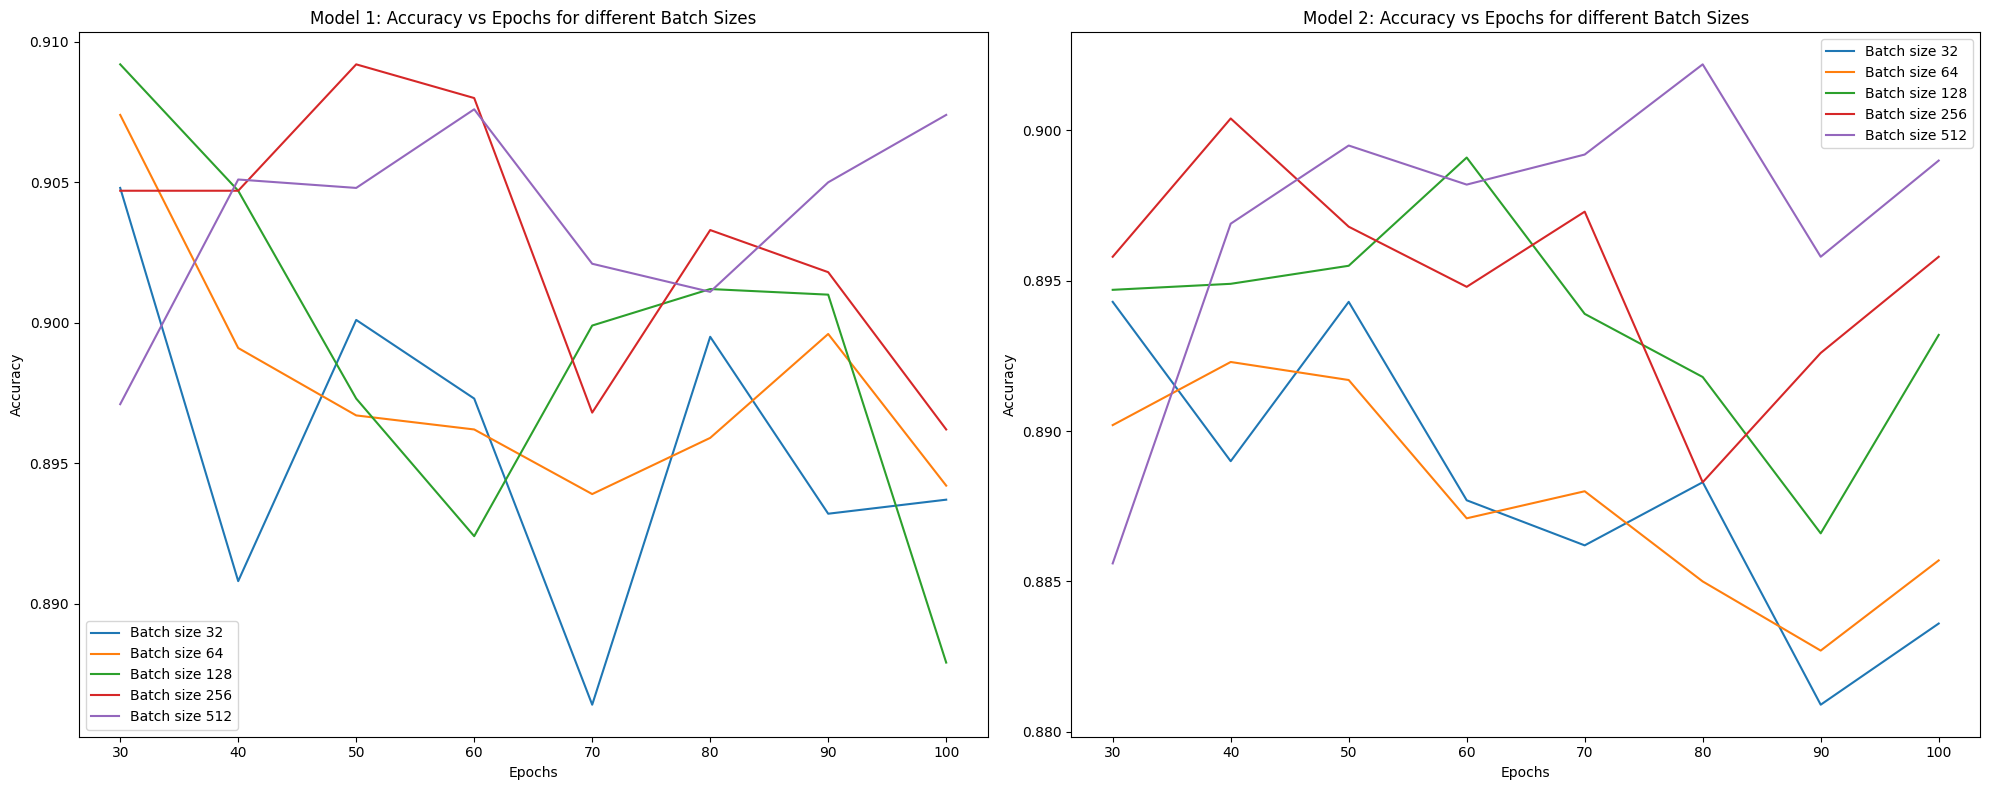

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for batch_size in batch_sizes:
    ax1.plot(pivot_1.index, pivot_1[batch_size], label=f'Batch size {batch_size}')
    ax2.plot(pivot_2.index, pivot_2[batch_size], label=f'Batch size {batch_size}')

ax1.set_title('Model 1: Accuracy vs Epochs for different Batch Sizes')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.set_title('Model 2: Accuracy vs Epochs for different Batch Sizes')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()